In [2]:
from IPython.core.display import Image, HTML
from patsy import dmatrices, demo_data, ContrastMatrix, Poly
from sklearn import linear_model, metrics
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import plotly.plotly as py
import pylab as pl
import seaborn as sns
import sklearn.cross_validation
import statsmodels.api as sm
import string
import warnings

plt.style.use('fivethirtyeight')
%matplotlib inline

## Pre-Task: Describe the goals of your study

To use logistic regression to determine what factors played a part in who survived and who did not in the Titanic sinking.

## Part 1: Aquire the Data

Code didn't work on home mac either. Just pulled from SQL directly.

#### 1. Connect to the remote database

#### 2. Query the database and aggregate the data

In [3]:
# mac path
df = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-05/code/train.csv')

#windows path
# df = pd.read_csv('C:/Uers/Elizabeth/GA-DSI/projects/projects-weekly/project-05/code/train.csv')

df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 5. What are the risks and assumptions of our data? 

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [4]:
df.describe()

/Users/EKandTower/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning:

Invalid value encountered in percentile



,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
index          891 non-null int64
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [6]:
# reading in data with ages populated

# mac path
df1 = pd.read_csv('/Users/EKandTower/GA-DSI/projects/projects-weekly/project-05/code/titanic.csv')

#windows path
# df1 = pd.read_csv('C:/Users/Elizabeth/GA-DSI/projects/projects-weekly/project-05/code/titanic.csv')


#remove index row
df1.pop('index')

# set passenger number as index
df1=df1.set_index('PassengerId')

#impute na with medians
df1.fillna(df1.median(), inplace=True)

df1.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30.0000,A23,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.7750,NaN,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,NaN,C
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,71,0,0,370369,7.7500,NaN,Q


In [7]:
df1.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [8]:
df1.describe()


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,28.815937,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.826253,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 631 to 774
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(1), int64(5), object(5)
memory usage: 83.5+ KB


In [10]:
df1.sum()

Survived      342.0000
Pclass       2057.0000
Age         25675.0000
SibSp         466.0000
Parch         340.0000
Fare        28693.9493
dtype: float64

#### 2. Visualize the Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c2cb50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b419950>]], dtype=object)

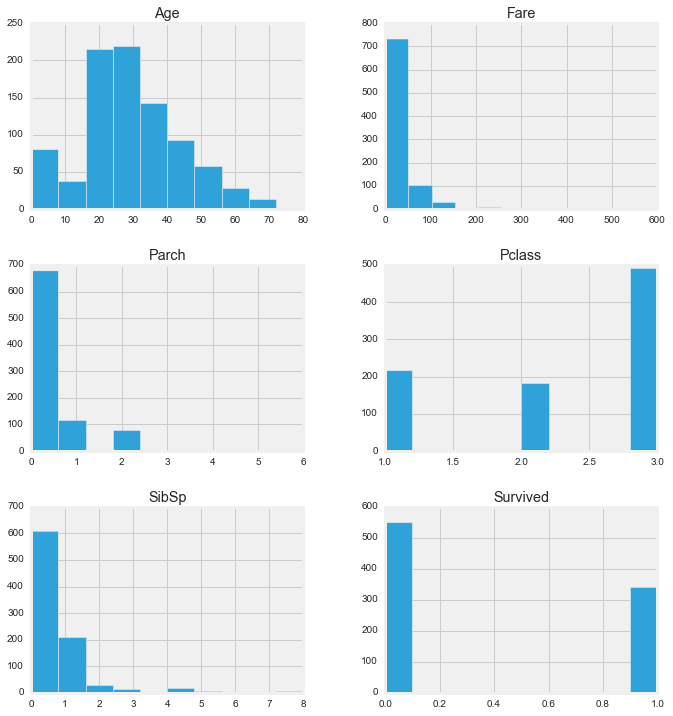

In [11]:
#histograms of numerical data
df1.hist(figsize=(10,12))

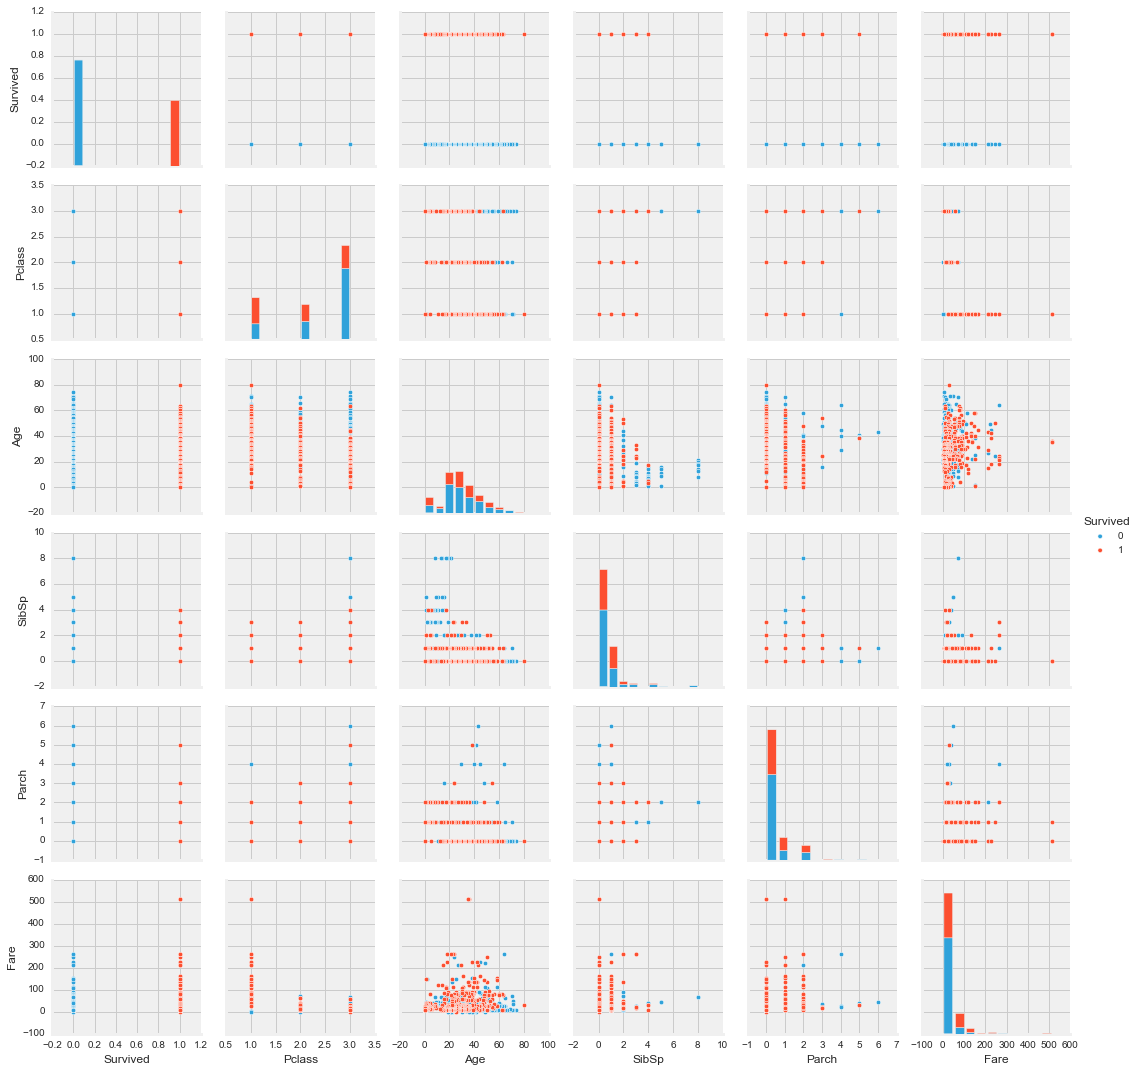

In [12]:
palette = "diverging"
sns.pairplot(df1, kind="scatter", hue="Survived")

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [13]:
# creating dummies for gender, ticket class, and port of embarkment

gendummy = pd.get_dummies(df1['Sex'], prefix='Sex')
classdummy = pd.get_dummies(df1['Pclass'], prefix='Class')
portdummy = pd.get_dummies(df1['Embarked'], prefix='Port')

In [14]:
# binning ages

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 81]

abns = ['5', '15', '25', '35', '45', '55', '65', '75']

ages = pd.cut(df1['Age'], age_bins, labels=abns, right=False)

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [36]:
orig_colls_to_keep = ['Survived', 'SibSp','Parch']
df2 = df1[orig_colls_to_keep].join(gendummy.ix[:,'Sex_male':])
df2 = df2.join(classdummy)
df2 = df2.join(portdummy)
df2['ages'] = ages.astype(int)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 631 to 774
Data columns (total 11 columns):
Survived    891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Sex_male    891 non-null float64
Class_1     891 non-null float64
Class_2     891 non-null float64
Class_3     891 non-null float64
Port_C      891 non-null float64
Port_Q      891 non-null float64
Port_S      891 non-null float64
ages        891 non-null int64
dtypes: float64(7), int64(4)
memory usage: 83.5 KB


In [16]:
agedummy = pd.get_dummies(df2['ages'], prefix='Age')
df2 = df2.join(agedummy)
df2.pop('ages')
df2.columns =['Survived','SibSp','Parch','male','1st_Class','2nd_Class','3rd_Class','Port_C','Port_Q','Port_S','Age0-10'\
      ,'Age10-20','Age20-30','Age30-40','Age40-50','Age50-60','Age60-70','Age70-80']
df2.head()

,Survived,SibSp,Parch,male,1st_Class,2nd_Class,3rd_Class,Port_C,Port_Q,Port_S,Age0-10,Age10-20,Age20-30,Age30-40,Age40-50,Age50-60,Age60-70,Age70-80
PassengerId,,,,,,,,,,,,,,,,,,
631,1,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
852,0,0,0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
494,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
97,0,0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
117,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [17]:
df2.sort_index(axis=0, inplace=True)

len(df2)

891

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [18]:
s = df2['Survived'].astype(int)
# print s
type(s)

pandas.core.series.Series

#### 3. Conduct the logistic regression

In [35]:
train_cols = df2.columns[1:]
logit = sm.Logit(df2['Survived'], df2[train_cols], maxiter=500)
result = logit.fit()

train_cols

         Current function value: 0.436621
         Iterations: 35


/Users/EKandTower/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:466: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



Index([u'SibSp', u'Parch', u'male', u'1st_Class', u'2nd_Class', u'3rd_Class',
       u'Port_C', u'Port_Q', u'Port_S', u'Age0-10', u'Age10-20', u'Age20-30',
       u'Age30-40', u'Age40-50', u'Age50-60', u'Age60-70', u'Age70-80'],
      dtype='object')

#### 4. Examine the coefficients to see our correlations

In [20]:
def examine_coefficients(model, dftitles):
    dftitles = pd.DataFrame(
        { 'Coefficient' : model.coef_[0] , 'Feature' : dftitles.columns}
    ).sort_values(by='Coefficient')
    return dftitles[dftitles.Coefficient !=0 ]

In [21]:
model = linear_model.LogisticRegression(penalty = 'l1', C = 10.0) 

X = df2[['SibSp','Parch','male','1st_Class','2nd_Class','3rd_Class','Port_C','Port_Q','Port_S','Age0-10'\
      ,'Age10-20','Age20-30','Age30-40','Age40-50','Age50-60','Age60-70','Age70-80']]
y = df2['Survived']

model.fit(X, y)
datatitle = examine_coefficients(model, X)

In [22]:
datatitle

,Coefficient,Feature
2,-2.794226,male
5,-0.699238,3rd_Class
16,-0.677399,Age70-80
15,-0.594686,Age60-70
0,-0.356397,SibSp
14,-0.351353,Age50-60
8,-0.328782,Port_S
1,-0.114185,Parch
7,0.030305,Port_Q
4,0.580888,2nd_Class


In [23]:
print df2.corr()



           Survived     SibSp     Parch      male  1st_Class  2nd_Class  \
Survived   1.000000 -0.035322  0.081629 -0.543351   0.285904   0.093349   
SibSp     -0.035322  1.000000  0.414838 -0.114631  -0.054582  -0.055932   
Parch      0.081629  0.414838  1.000000 -0.245489  -0.017633  -0.000734   
male      -0.543351 -0.114631 -0.245489  1.000000  -0.098013  -0.064746   
1st_Class  0.285904 -0.054582 -0.017633 -0.098013   1.000000  -0.288585   
2nd_Class  0.093349 -0.055932 -0.000734 -0.064746  -0.288585   1.000000   
3rd_Class -0.322308  0.092548  0.015790  0.137143  -0.626738  -0.565210   
Port_C     0.168240 -0.059528 -0.011069 -0.082853   0.296423  -0.125416   
Port_Q     0.003650 -0.026354 -0.081228 -0.074115  -0.155342  -0.127301   
Port_S    -0.155660  0.070941  0.063036  0.125722  -0.170379   0.192061   
Age0-10    0.074518  0.291176  0.295371 -0.052564  -0.160171  -0.021768   
Age10-20  -0.009731  0.132921  0.044031 -0.057318  -0.086640  -0.048459   
Age20-30  -0.059480 -0.10

In [24]:
df2.sum()

Survived     342.0
SibSp        466.0
Parch        340.0
male         577.0
1st_Class    216.0
2nd_Class    184.0
3rd_Class    491.0
Port_C       168.0
Port_Q        77.0
Port_S       644.0
Age0-10       94.0
Age10-20     121.0
Age20-30     284.0
Age30-40     196.0
Age40-50     115.0
Age50-60      51.0
Age60-70      23.0
Age70-80       7.0
dtype: float64

There were 577 male aboard and 314 females, about 65% of the passengers. Over half of the passengers were in steerage and 72% boarded in Southampton.

#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33)

In [26]:
print 'Length of X_train: ' + str(len(X_train))
print 'Length of y_train: ' + str(len(y_train))
print
print 'Length of X_test: ' + str(len(X_test))
print 'Length of y_test: ' + str(len(y_test))

Length of X_train: 596
Length of y_train: 596

Length of X_test: 295
Length of y_test: 295


In [27]:
model = linear_model.LogisticRegression(penalty = 'l1', C = 10.0) 
# 
model.fit(X_test, y_test)
datatitle = examine_coefficients(model, X)
datatitle

,Coefficient,Feature
2,-2.494790,male
14,-1.140613,Age50-60
1,-0.292912,Parch
13,-0.179747,Age40-50
0,-0.019166,SibSp
5,-0.005095,3rd_Class
8,0.004606,Port_S
11,0.054130,Age20-30
12,0.107896,Age30-40
10,0.479930,Age10-20


#### 7. Predict the class labels for the *Test* set

In [28]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0])

#### 8. Predict the class probabilities for the *Test* set

In [29]:
y_pp = model.predict_proba(X_test)
y_pp

array([[ 0.89556766,  0.10443234],
       [ 0.87527823,  0.12472177],
       [ 0.56953069,  0.43046931],
       [ 0.89043109,  0.10956891],
       [ 0.83963893,  0.16036107],
       [ 0.89599765,  0.10400235],
       [ 0.58544903,  0.41455097],
       [ 0.91550586,  0.08449414],
       [ 0.14655567,  0.85344433],
       [ 0.41550208,  0.58449792],
       [ 0.83130123,  0.16869877],
       [ 0.89599765,  0.10400235],
       [ 0.89043109,  0.10956891],
       [ 0.099448  ,  0.900552  ],
       [ 0.89043109,  0.10956891],
       [ 0.40139936,  0.59860064],
       [ 0.64085095,  0.35914905],
       [ 0.89556766,  0.10443234],
       [ 0.89556766,  0.10443234],
       [ 0.47812425,  0.52187575],
       [ 0.89043109,  0.10956891],
       [ 0.14318885,  0.85681115],
       [ 0.87015734,  0.12984266],
       [ 0.64645568,  0.35354432],
       [ 0.27790775,  0.72209225],
       [ 0.84853006,  0.15146994],
       [ 0.8995159 ,  0.1004841 ],
       [ 0.92145448,  0.07854552],
       [ 0.64525032,

#### 9. Evaluate the *Test* set

In [30]:
for metric in ['accuracy', 'precision', 'recall', 'roc_auc']:
    scores = cross_val_score(model, X, y, scoring=metric)
    print("mean {}: {}, all: {}".format(metric, scores.mean(), scores))

mean accuracy: 0.796857463524, all: [ 0.79124579  0.80808081  0.79124579]
mean precision: 0.757682615506, all: [ 0.75490196  0.73553719  0.7826087 ]
mean recall: 0.695906432749, all: [ 0.6754386   0.78070175  0.63157895]
mean roc_auc: 0.848808040137, all: [ 0.82722174  0.86274087  0.85646151]


#### 10. Cross validate the test set

In [31]:

cross_val_score(model, X, y, n_jobs=1, cv=5)

array([ 0.79888268,  0.7877095 ,  0.80337079,  0.7752809 ,  0.79096045])

In [32]:
cross_val_score(model, X, y, n_jobs=1, cv=5).mean()

0.79124086322832188

In [33]:
logreg_cv = LogisticRegressionCV(Cs=20, solver='liblinear', cv=3, penalty='l1', scoring='f1')
cv_model = logreg_cv.fit(X_train, y_train)

print('best C for class:')
best_C = {logreg_cv.classes_[i]:x for i, (x, c) in enumerate(zip(logreg_cv.Cs_, logreg_cv.classes_))}
print(best_C)

/Users/EKandTower/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning:

F-score is ill-defined and being set to 0.0 due to no predicted samples.



best C for class:
{0: 0.0001, 1: 0.00026366508987303583}


In [34]:
gs.best_params_

NameError: name 'gs' is not defined

#### 11. Check the Classification Report

In [ ]:
print classification_report(y_test, y_pred)

#### 12. What do the classification metrics tell us?

This is a pretty strong model with precision, recall, and f1-score all averaging 0.84

#### 13. Check the Confusion Matrix

In [ ]:
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))

confusion = pd.DataFrame(conmat, index=['Survived', 'Fatality'],
                         columns=['predicted_Survived','predicted_Fatality'])

print(confusion)

#### 14. What does the Confusion Matrix tell us? 

There were 156 true negatives (predicted fatality correctly), 26 false positives/TypeI Error (predicted alive, but actually dead), 28 false negatives/Type-II Error (predicted dead, actually alive), and 85 true positives (perdicted survived correctly).

#### 15. Plot the ROC curve

In [ ]:
logreg = LogisticRegression(random_state=77)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)


# generic curve plotting function
def auc_plotting_function(rate1, rate2, rate1_name, rate2_name, curve_name):
    AUC = auc(rate1, rate2)
    # Plot of a ROC curve for class 1 (fatality)
    plt.figure(figsize=[11,9])
    plt.plot(rate1, rate2, label=curve_name + ' (area = %0.2f)' % AUC, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(rate1_name, fontsize=18)
    plt.ylabel(rate2_name, fontsize=18)
    plt.title(curve_name + ' fatality', fontsize=18)
    plt.legend(loc="lower right")
    plt.show()

# plot receiving operator characteristic curve
def plot_roc(y_true, y_score):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc_plotting_function(fpr, tpr, 'False Positive Rate', 'True Positive Rate', 'ROC')
    
Y_score = logreg.decision_function(X_test)
plot_roc(y_test, Y_score)


#### 16. What does the ROC curve tell us?

The extent to which a model is likely to give true positives (correct readings) versus false positives (incorrect readings). The larger the area under the curve (the space from the lower righthand corner to the ROC curve) the more likely it is that you will give a correct reading.

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [ ]:
logreg = LogisticRegression(solver='liblinear')
C_vals = np.logspace(-5,1,50)
penalties = ['l1','l2']

gs = GridSearchCV(logreg, {'penalty': penalties, 'C': C_vals}, cv=5)
gs.fit(X, y)



#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

In [ ]:
gs.best_params_

In [ ]:
logreg = LogisticRegression(C=gs.best_params_['C'], penalty=gs.best_params_['penalty'])
cv_model = logreg.fit(X_train, y_train)


cv_pred = cv_model.predict(X_test)

cm = confusion_matrix(y_test, cv_pred, labels=logreg.classes_)

cm = pd.DataFrame(cm, columns=logreg.classes_, index=logreg.classes_)

cm

In [ ]:
print classification_report(y_test, cv_pred, labels=logreg.classes_)

#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

Lasso will find betas that don't have significant impact on the model and drop their coefficients to (or very close to) zero, effectively killing them out of the model (and effectively performing feature elimination). This encourages saparcity.

Ridge doesn't kill weak betas off, it just pushes their coefficients down to the point where they only have token representation in the model.

*smartass response: there is no difference between the difference. They have the same difference.

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

Ridge is useful when you have a lot of betas with small coefficients but not if there are a lot of betas with large coefficients. Ridge also needs the betas to be scaled while LASSO is more flexible.

In this project LASSO was a better utility because gender and, to lesser degrees, class and age dominated the model. There were only a couple of fairly small coefficients and Fare was highly correlated with class.

Ridge would be better in a situation where there were many data points that all contributed slightly.

In the home price exercises Ridge would be better because there are so many things that can sway price.

#### 5. [BONUS] Explain how the regularization strength (C) modifies the regression loss function. Why do the Ridge and Lasso penalties have their respective effects on the coefficients?

C is basically 1/alpha so you're talking about the same concept just from the other side of things. It acts to reduce the power of betas' coefficients to either eliminate factors (LASSO) or reduce them so they are more uniform (Ridge)

#### 6.a. [BONUS] You decide that you want to minimize false positives. Use the predicted probabilities from the model to set your threshold for labeling the positive class to need at least 90% confidence. How and why does this affect your confusion matrix?

In [ ]:
y_pp = model.predict_proba(X_test)
y_pp

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [ ]:
GK_cv = KNeighborsClassifier(n_neighbors=8, weights='distance', n_jobs=5,)
cv_model = GK_cv.fit(X_train, y_train)

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [ ]:
gs.best_params_


In [ ]:
print classification_report(y_test, cv_pred, labels=GK_cv.classes_)

classification numbers were 4 points softer than the logistic regression model's.

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model?

#### [BONUS] Why?

The higher the k the more vairance / less bias you have. As you go further from the point of origin you get a blurier picture.

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

logistic regression would be more useful when there are multiple factors that could impact the outcome. kNN is a very simple method.

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [ ]:
def knn_classifier(labeled_points, new_point, k):
    if k % 2 == 0:
        return "Must use odd k, to prevent ties"
        label_distances = []

    for p in labeled_points:

        distance = calculate_distance(p[0],new_point)
        label_distances.append((distance,p[1]))
    
    label_distances.sort() #
  
    prediction = neighbor_vote([label[1] for label in label_distances[:k]])
    return prediction


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=77)

# Split 70/30 into initial data and new points to classify
training_df = pd.DataFrame({'feature1':X_train[:,0],'feature2':X_train[:,1],'class':y_train})
test_df = pd.DataFrame({'feature1':X_test[:,0],'feature2':X_test[:,1],'class':y_test})

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

#### 7. [BONUS] Plot the ROC curves for the optimized logistic regression model and the optimized kNN model on the same plot.

## Part 7: [BONUS] Precision-recall

#### 1. Gridsearch the same parameters for logistic regression but change the scoring function to 'average_precision'

`'average_precision'` will optimize parameters for area under the precision-recall curve instead of for accuracy.

#### 2. Examine the best parameters and score. Are they different than the logistic regression gridsearch in part 5?

#### 3. Create the confusion matrix. Is it different than when you optimized for the accuracy? If so, why would this be?

#### 4. Plot the precision-recall curve. What does this tell us as opposed to the ROC curve?

[See the sklearn plotting example here.](http://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html)

## Part 8: [VERY BONUS] Decision trees, ensembles, bagging

#### 1. Gridsearch a decision tree classifier model on the data, searching for optimal depth. Create a new decision tree model with the optimal parameters.

#### 2. Compare the performace of the decision tree model to the logistic regression and kNN models.

#### 3. Plot all three optimized models' ROC curves on the same plot. 

#### 4. Use sklearn's BaggingClassifier with the base estimator your optimized decision tree model. How does the performance compare to the single decision tree classifier?

#### 5. Gridsearch the optimal n_estimators, max_samples, and max_features for the bagging classifier.

#### 6. Create a bagging classifier model with the optimal parameters and compare it's performance to the other two models.